In [1]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import batch_data_processing as bdp

In [2]:
# Insert files general path
path = 'C:/Users/ubillusj/Desktop/CMG/Ubillus_simulations/2D_model_dissolution_closed/results/'

# Variables and constants
sim_dict = pd.read_csv(path + 'S1/S11/Het2DTest1a Porosity 2010-Jan-01.gslib',
                       sep = ' ',
                       skiprows= 9,
                       nrows=33000,
                       index_col=False, 
                       header = None,
                       names= ['i_index','j_index','k_index','x','y','z'])

sim_dict['block_volume'] = pd.read_csv(path + 'S1/S11/Het2DTest1a Gross Block Volume 2010-Jan-01.gslib',
                       sep = ' ',
                       skiprows= 9,
                       nrows=33000,
                       index_col=False,
                       header= None,
                       usecols=[6])

special_dict = pd.read_excel(path + 'S1/S11/special.xlsx',
                                sheet_name = 0,
                                skiprows= 5,
                                usecols=[0,1],
                                names=['t_days','Date'],
                                parse_dates=['Date'])

# Function that reads all gslib files in a folder and returns a dictionary with the dataframes 
for n in range(1,4):
    for m in range(1,4):
        parent_folder = f'S{n}'
        folder = f'S{n}{m}'

        if m == 1:
            sim_dict[f'porosity{n}{m}']= pd.read_csv(path + parent_folder + '/' + folder + '/' + f'Het2DTest1a Porosity 2010-Jan-01.gslib',
                                                    sep = ' ',
                                                    skiprows= 9,
                                                    nrows=33000,
                                                    index_col=False,
                                                    header = None,
                                                    usecols=[6])
            
            sim_dict[f'rel_perm_num{n}{m}'] = pd.read_csv(path + parent_folder + '/' + folder + '/' + f'Het2DTest1a Rel Perm Set Num 2010-Jan-01.gslib',
                                                          sep = ' ',
                                                          skiprows= 9,
                                                          nrows=33000,
                                                          index_col=False,
                                                          header= None,
                                                          usecols=[6])

        # Build dictionary
        sim_dict[f'pres_bup{n}{m}'] = pd.read_csv(path + parent_folder + '/' + folder + '/' + f'Het2DTest1a PBup 2030-Dec-31.gslib',
                                                  sep = ' ',
                                                  skiprows= 9,
                                                  nrows=33000,
                                                  index_col=False,
                                                  header= None,
                                                  usecols=[6])
        
        sim_dict[f'gas_saturation30{n}{m}'] = pd.read_csv(path + parent_folder + '/' + folder + '/' + f'Het2DTest1a Gas Saturation.gslib',
                                                          sep = ' ',
                                                          skiprows= 9,
                                                          nrows=33000,
                                                          index_col=False,
                                                          header= None,
                                                          usecols=[6])
        sim_dict[f'gas_saturation60{n}{m}'] = pd.read_csv(path + parent_folder + '/' + folder + '/' + f'Het2DTest1a Gas Saturation.gslib',
                                                          sep = ' ',
                                                          skiprows= 33018,
                                                          nrows=66018,
                                                          index_col=False,
                                                          header= None,
                                                          usecols=[6])
        
        special_dict[f'scCO2(mol){n}{m}'] = pd.read_excel(path + parent_folder + '/' + folder + '/' + f'special.xlsx',
                                                      sheet_name = 0,
                                                      skiprows= 5,
                                                      usecols=[3])
        
        special_dict[f'trappedCO2(mol){n}{m}'] = pd.read_excel(path + parent_folder + '/' + folder + '/' + f'special.xlsx',
                                                      sheet_name = 0,
                                                      skiprows= 5,
                                                      usecols=[4])
        
        special_dict[f'CO2solubility(mol){n}{m}'] = pd.read_excel(path + parent_folder + '/' + folder + '/' + f'special.xlsx',
                                                        sheet_name = 0,
                                                        skiprows= 5,
                                                        usecols=[2])

geoshape = np.max(sim_dict['k_index']),np.max(sim_dict['i_index'])

sim_dict.tail()

C:\Users\ubillusj\AppData\Local\Temp\ipykernel_21376\2318182458.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  sim_dict = pd.read_csv(path + 'S1/S11/Het2DTest1a Porosity 2010-Jan-01.gslib',


i_index  j_index  k_index        x   y       z  block_volume  \
32995      146        1        1  31864.5 -40  8001.1         38544   
32996      147        1        1  32083.5 -40  8001.1         38544   
32997      148        1        1  32302.5 -40  8001.1         38544   
32998      149        1        1  32521.5 -40  8001.1         38544   
32999      150        1        1  32740.5 -40  8001.1         38544   

       porosity11  rel_perm_num11  pres_bup11  ...  rel_perm_num31  \
32995    0.285421               1     2498.88  ...               2   
32996    0.285689               1     2498.88  ...               2   
32997    0.291525               1     2498.88  ...               2   
32998    0.296260               1     2498.88  ...               2   
32999    0.276893               1     2498.88  ...               2   

       pres_bup31  gas_saturation3031  gas_saturation6031  pres_bup32  \
32995     1728.45        7.258850e-07        6.730150e-07     1734.51   
32996     1728.50        7.258790e-07        6.730160e-07     1734.57   
32997     1728.43        7.258870e-07        6.730130e-07     1734.48   
32998     1728.53        7.258770e-07        6.730150e-07     1734.59   
32999     1729.92        7.257370e-07        6.730100e-07     1735.94   

       gas_saturation3032  gas_saturation6032  pres_bup33  gas_saturation3033  \
32995        7.252890e-07        6.713310e-07     1735.54        7.251850e-07   
32996        7.252810e-07        6.713310e-07     1735.60        7.251770e-07   
32997        7.252940e-07        6.713300e-07     1735.51        7.251900e-07   
32998        7.252810e-07        6.713310e-07     1735.62        7.251770e-07   
32999        7.251490e-07        6.713290e-07     1736.96        7.250460e-07   

       gas_saturation6033  
32995        6.707710e-07  
32996        6.707710e-07  
32997        6.707700e-07  
32998        6.707710e-07  
32999        6.707690e-07  

[5 rows x 40 columns]

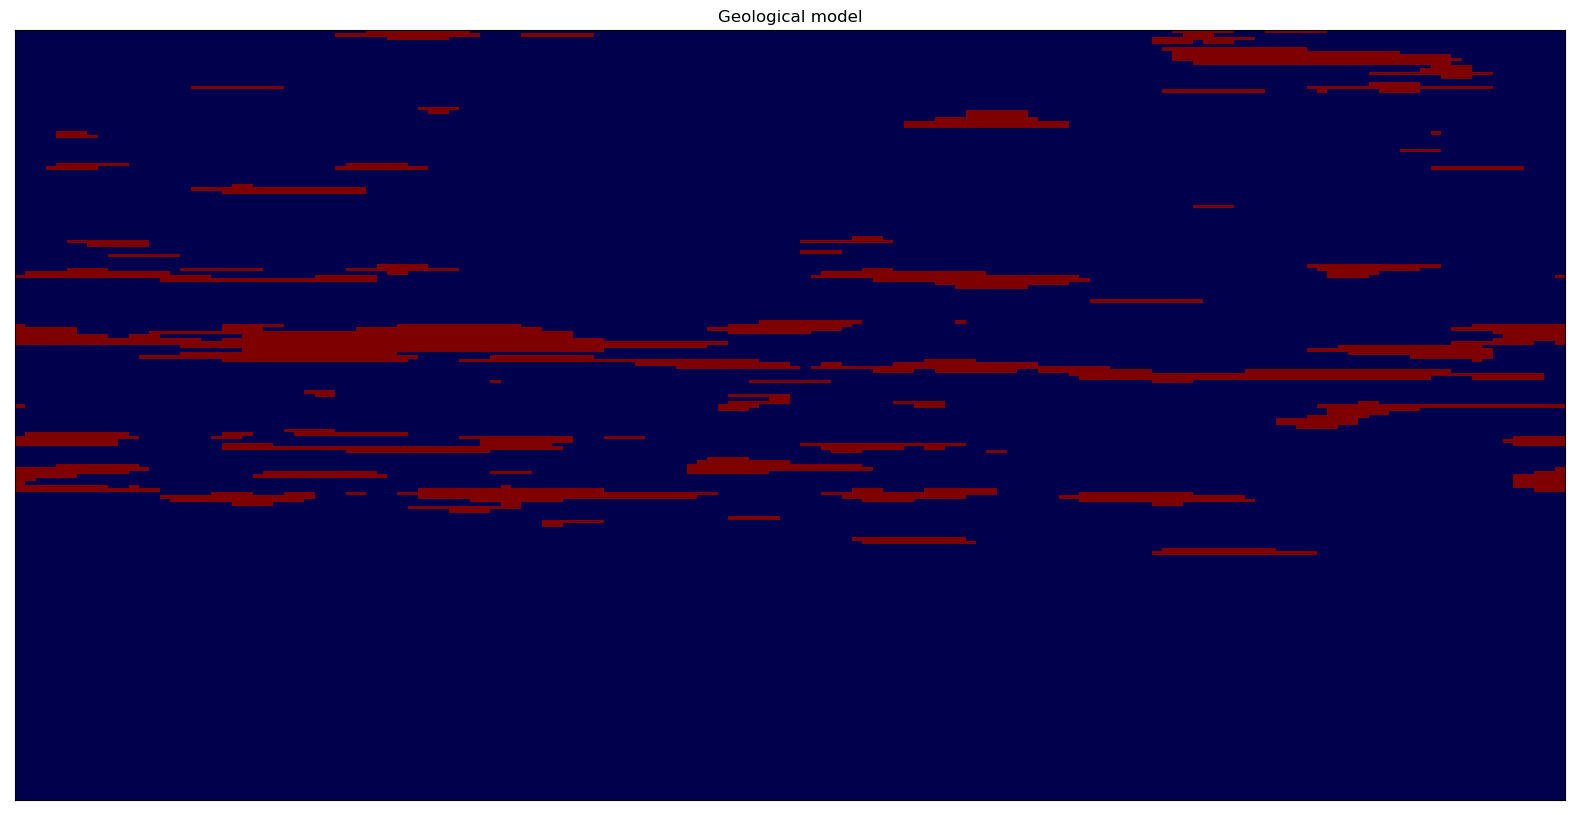

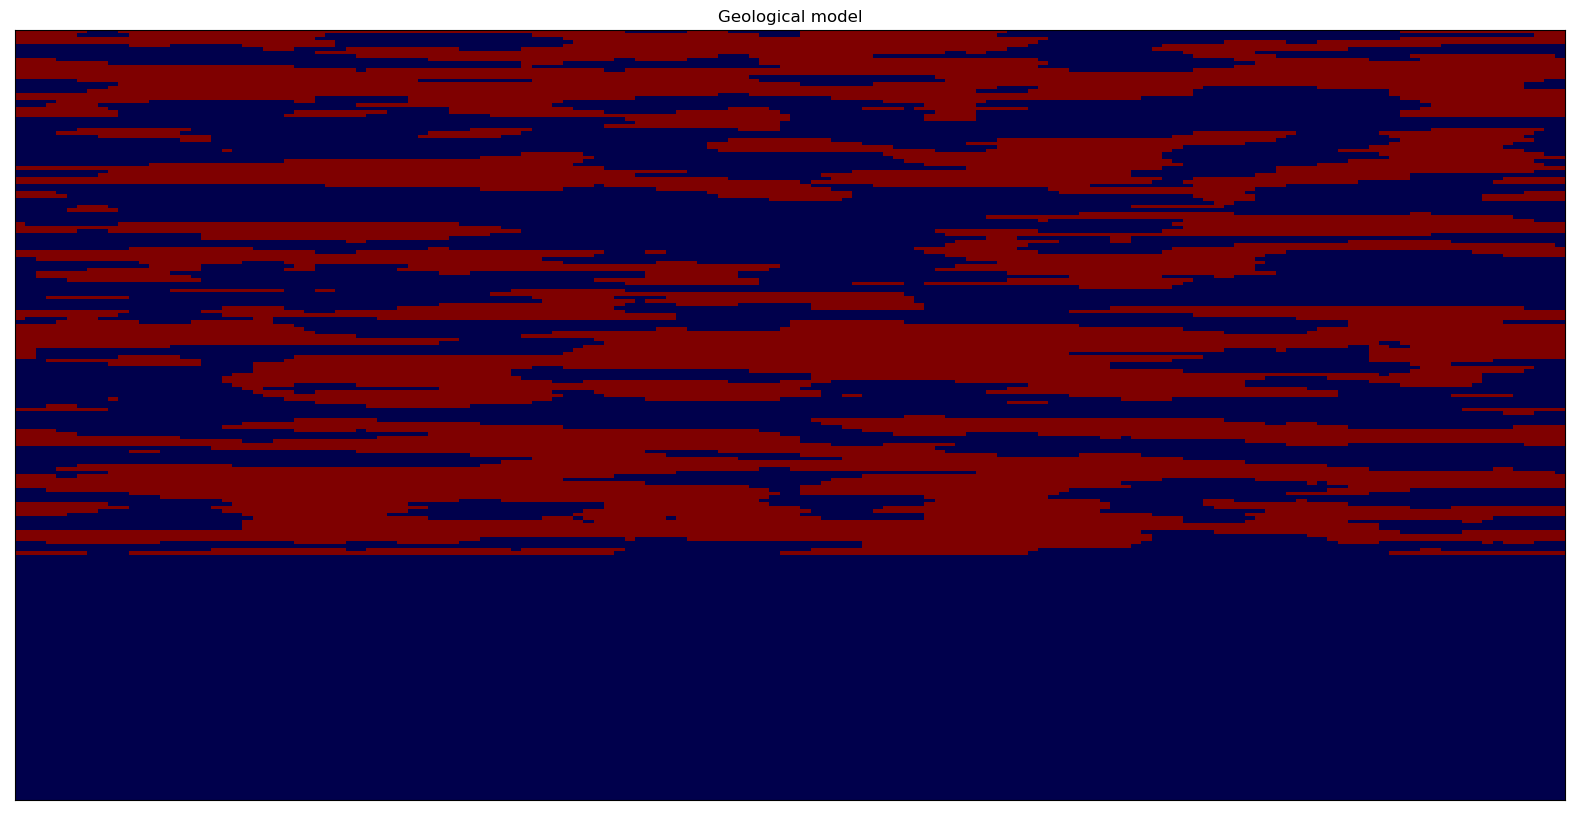

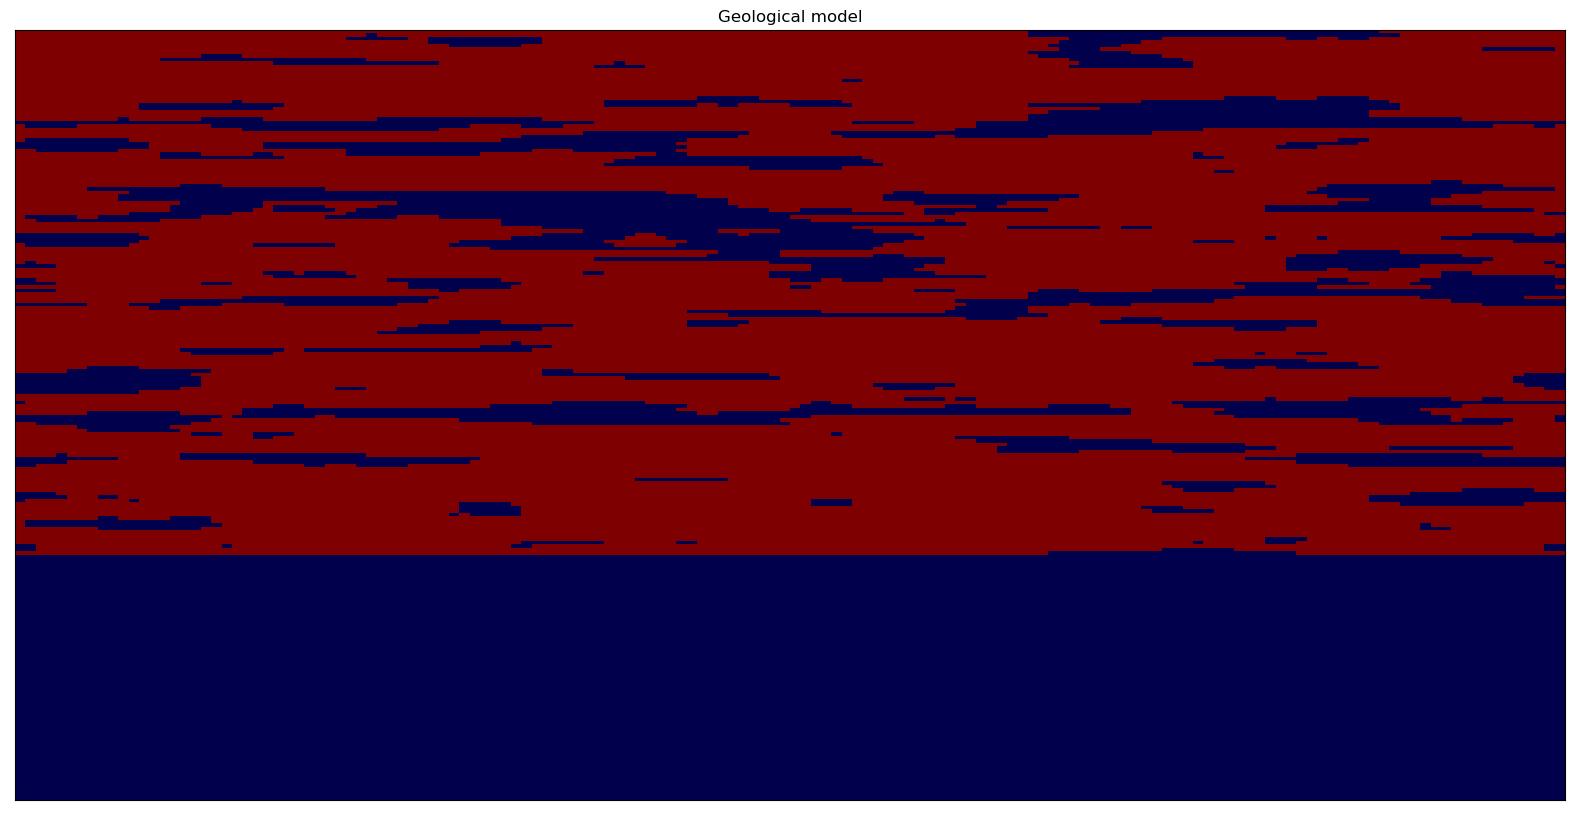

In [3]:
# Build 2D model
geomodel_1 = bdp.twoD_model_builder(sim_dict['rel_perm_num11'],geoshape)
geomodel_2 = bdp.twoD_model_builder(sim_dict['rel_perm_num21'],geoshape)
geomodel_3 = bdp.twoD_model_builder(sim_dict['rel_perm_num31'],geoshape)

In [4]:
# Plume and saturation field

plume30_11,mean11 = bdp.saturation_field(sim_dict['gas_saturation3011'],geoshape)
plume30_12,mean12 = bdp.saturation_field(sim_dict['gas_saturation3012'],geoshape)
plume30_13,mean13 = bdp.saturation_field(sim_dict['gas_saturation3013'],geoshape)

plume60_11,mean116 = bdp.saturation_field(sim_dict['gas_saturation6011'],geoshape)
plume60_12,mean126 = bdp.saturation_field(sim_dict['gas_saturation6012'],geoshape)
plume60_13,mean136 = bdp.saturation_field(sim_dict['gas_saturation6013'],geoshape)

plume30_21,mean21 = bdp.saturation_field(sim_dict['gas_saturation3021'],geoshape)
plume30_22,mean22 = bdp.saturation_field(sim_dict['gas_saturation3022'],geoshape)
plume30_23,mean23 = bdp.saturation_field(sim_dict['gas_saturation3023'],geoshape)

plume60_21,mean216 = bdp.saturation_field(sim_dict['gas_saturation6021'],geoshape)
plume60_22,mean226 = bdp.saturation_field(sim_dict['gas_saturation6022'],geoshape)
plume60_23,mean236 = bdp.saturation_field(sim_dict['gas_saturation6023'],geoshape)

plume30_31,mean31 = bdp.saturation_field(sim_dict['gas_saturation3013'],geoshape)
plume30_32,mean32 = bdp.saturation_field(sim_dict['gas_saturation3013'],geoshape)
plume30_33,mean33 = bdp.saturation_field(sim_dict['gas_saturation3013'],geoshape)

plume60_31,mean316 = bdp.saturation_field(sim_dict['gas_saturation6031'],geoshape)
plume60_32,mean326 = bdp.saturation_field(sim_dict['gas_saturation6032'],geoshape)
plume60_33,mean336 = bdp.saturation_field(sim_dict['gas_saturation6033'],geoshape)

# Plot all plumes in 3x2 grid
fig, axs = plt.subplots(2, 3, figsize=(25,10),dpi=600)

for j in range(3):
    plume_30 = f'plume30_1{j+1}'
    plume_glob_30 = globals()[plume_30]

    plume_60 = f'plume60_1{j+1}'
    plume_glob_60 = globals()[plume_60]

    mean_30 = f'mean1{j+1}'
    mean_glob_30 = globals()[mean_30]

    mean_60 = f'mean1{j+1}6'
    mean_glob_60 = globals()[mean_60]

    axs[0,j].imshow(geomodel_1, cmap='binary',aspect='auto')
    axs[1,j].imshow(geomodel_1, cmap='binary',aspect='auto')
    im = axs[0,j].imshow(plume_glob_30, cmap='jet',aspect='auto',vmin=0.0003,vmax=1,alpha=0.9)
    axs[1,j].imshow(plume_glob_60, cmap='jet',aspect='auto',vmin=0.0003,vmax=1,alpha=0.9)
    axs[0,j].set_title(f'Plume S1{j+1} - Avg CO2 Sat: {round(mean_glob_30,3)}',fontsize=10)
    axs[1,j].set_title(f'Plume S1{j+1} - Avg CO2 Sat: {round(mean_glob_60,3)}',fontsize=10)
    axs[0,j].set_xticks([])
    axs[0,j].set_yticks([])    
    axs[1,j].set_xticks([])
    axs[1,j].set_yticks([])

fig.colorbar(im, ax=axs.ravel().tolist(), orientation = 'vertical',shrink=0.5,pad=0.04,ticks=[0,0.2,0.4,0.6,0.8,1])
fig.text(0.45, 0.92, 'After 10 years of injection', ha='center',fontsize=15)
fig.text(0.45, 0.5, 'After 100 years post-injection', ha='center',fontsize=15)

plt.show()


In [5]:
# Plot all plumes in 3x2 grid
fig, axs = plt.subplots(2, 3, figsize=(25,10),dpi=600)

for j in range(3):
    plume_30 = f'plume30_2{j+1}'
    plume_glob_30 = globals()[plume_30]
    plume_60 = f'plume60_2{j+1}'
    plume_glob_60 = globals()[plume_60]

    mean_30 = f'mean2{j+1}'
    mean_glob_30 = globals()[mean_30]

    mean_60 = f'mean2{j+1}6'
    mean_glob_60 = globals()[mean_60]

    axs[0,j].imshow(geomodel_2, cmap='binary',aspect='auto')
    axs[1,j].imshow(geomodel_2, cmap='binary',aspect='auto')
    im = axs[0,j].imshow(plume_glob_30, cmap='jet',aspect='auto',vmin=0.0003,vmax=1,alpha=0.9)
    axs[1,j].imshow(plume_glob_60, cmap='jet',aspect='auto',vmin=0.0003,vmax=1,alpha=0.9)
    axs[0,j].set_title(f'Plume S2{j+1} - Avg CO2 Sat: {round(mean_glob_30,3)}',fontsize=10)
    axs[1,j].set_title(f'Plume S2{j+1} - Avg CO2 Sat: {round(mean_glob_60,3)}',fontsize=10)
    axs[0,j].set_xticks([])
    axs[0,j].set_yticks([])    
    axs[1,j].set_xticks([])
    axs[1,j].set_yticks([])

fig.colorbar(im, ax=axs.ravel().tolist(), orientation = 'vertical',shrink=0.5,pad=0.04,ticks=[0,0.2,0.4,0.6,0.8,1])
fig.text(0.45, 0.92, 'After 10 years of injection', ha='center',fontsize=15)
fig.text(0.45, 0.5, 'After 100 years post-injection', ha='center',fontsize=15)

plt.show()

In [6]:
# Plot all plumes in 3x2 grid
fig, axs = plt.subplots(2, 3, figsize=(25,10),dpi=600)

for j in range(3):
    plume_30 = f'plume30_3{j+1}'
    plume_glob_30 = globals()[plume_30]
    plume_60 = f'plume60_3{j+1}'
    plume_glob_60 = globals()[plume_60]

    mean_30 = f'mean3{j+1}'
    mean_glob_30 = globals()[mean_30]

    mean_60 = f'mean3{j+1}6'
    mean_glob_60 = globals()[mean_60]

    axs[0,j].imshow(geomodel_3, cmap='binary',aspect='auto')
    axs[1,j].imshow(geomodel_3, cmap='binary',aspect='auto')
    im = axs[0,j].imshow(plume_glob_30, cmap='jet',aspect='auto',vmin=0.0003,vmax=1,alpha=0.9)
    axs[1,j].imshow(plume_glob_60, cmap='jet',aspect='auto',vmin=0.0003,vmax=1,alpha=0.9)
    axs[0,j].set_title(f'Plume S3{j+1} - Avg CO2 Sat: {round(mean_glob_30,3)}',fontsize=10)
    axs[1,j].set_title(f'Plume S3{j+1} - Avg CO2 Sat: {round(mean_glob_60,3)}',fontsize=10)
    axs[0,j].set_xticks([])
    axs[0,j].set_yticks([])    
    axs[1,j].set_xticks([])
    axs[1,j].set_yticks([])

fig.colorbar(im, ax=axs.ravel().tolist(), orientation = 'vertical',shrink=0.5,pad=0.04,ticks=[0,0.2,0.4,0.6,0.8,1])
fig.text(0.45, 0.92, 'After 10 years of injection', ha='center',fontsize=15)
fig.text(0.45, 0.5, 'After 100 years post-injection', ha='center',fontsize=15)

plt.show()

In [7]:
# Calculate residual trapping index, solubility trapping index and total trapping index for the same scenario different rel perm curves
##scenario 1
rti11, sti11, tti11 = bdp.indexes(special_dict['CO2solubility(mol)11'],special_dict['trappedCO2(mol)11'],special_dict['scCO2(mol)11'])
rti12, sti12, tti12 = bdp.indexes(special_dict['CO2solubility(mol)12'],special_dict['trappedCO2(mol)12'],special_dict['scCO2(mol)12'])
rti13, sti13, tti13 = bdp.indexes(special_dict['CO2solubility(mol)13'],special_dict['trappedCO2(mol)13'],special_dict['scCO2(mol)13'])

##scenario 2
rti21, sti21, tti21 = bdp.indexes(special_dict['CO2solubility(mol)21'],special_dict['trappedCO2(mol)21'],special_dict['scCO2(mol)21'])
rti22, sti22, tti22 = bdp.indexes(special_dict['CO2solubility(mol)22'],special_dict['trappedCO2(mol)22'],special_dict['scCO2(mol)22'])
rti23, sti23, tti23 = bdp.indexes(special_dict['CO2solubility(mol)23'],special_dict['trappedCO2(mol)23'],special_dict['scCO2(mol)23'])

##scenario 3
rti31, sti31, tti31 = bdp.indexes(special_dict['CO2solubility(mol)31'],special_dict['trappedCO2(mol)31'],special_dict['scCO2(mol)31'])
rti32, sti32, tti32 = bdp.indexes(special_dict['CO2solubility(mol)32'],special_dict['trappedCO2(mol)32'],special_dict['scCO2(mol)32'])
rti33, sti33, tti33 = bdp.indexes(special_dict['CO2solubility(mol)33'],special_dict['trappedCO2(mol)33'],special_dict['scCO2(mol)33'])

# Plot all nine scenarios in 3x3 plot
fig, axs = plt.subplots(3, 3, figsize=(25,15),sharex=True,sharey=True,dpi=600)
for i in range(3):
    for j in range(3):
        rt = f'rti{i+1}{j+1}'
        st = f'sti{i+1}{j+1}'
        rt_value = globals()[rt]
        st_value = globals()[st]
        axs[i,j].bar(range(len(special_dict['Date'])),height=st_value,label = 'STI')
        axs[i,j].bar(range(len(special_dict['Date'])),rt_value,label = 'RTI',bottom=st_value)
        axs[i,j].set_title(f'Scenario {i+1}{j+1}')
        axs[i,j].set_ylim(0,1)
        axs[i,j].tick_params(axis='both', which='both', labelsize=15)
        #add one legend for all subplots
        if i == 0 and j == 0:
            handles, labels = axs[i,j].get_legend_handles_labels()
            by_label = dict(zip(labels, handles))

fig.text(0.5, 0.07, 'Time (years)', ha='center', va='center',fontsize=20)
fig.legend(by_label.values(), by_label.keys(), loc='upper center',ncol=3,
            fontsize='large',bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True)


plt.show()


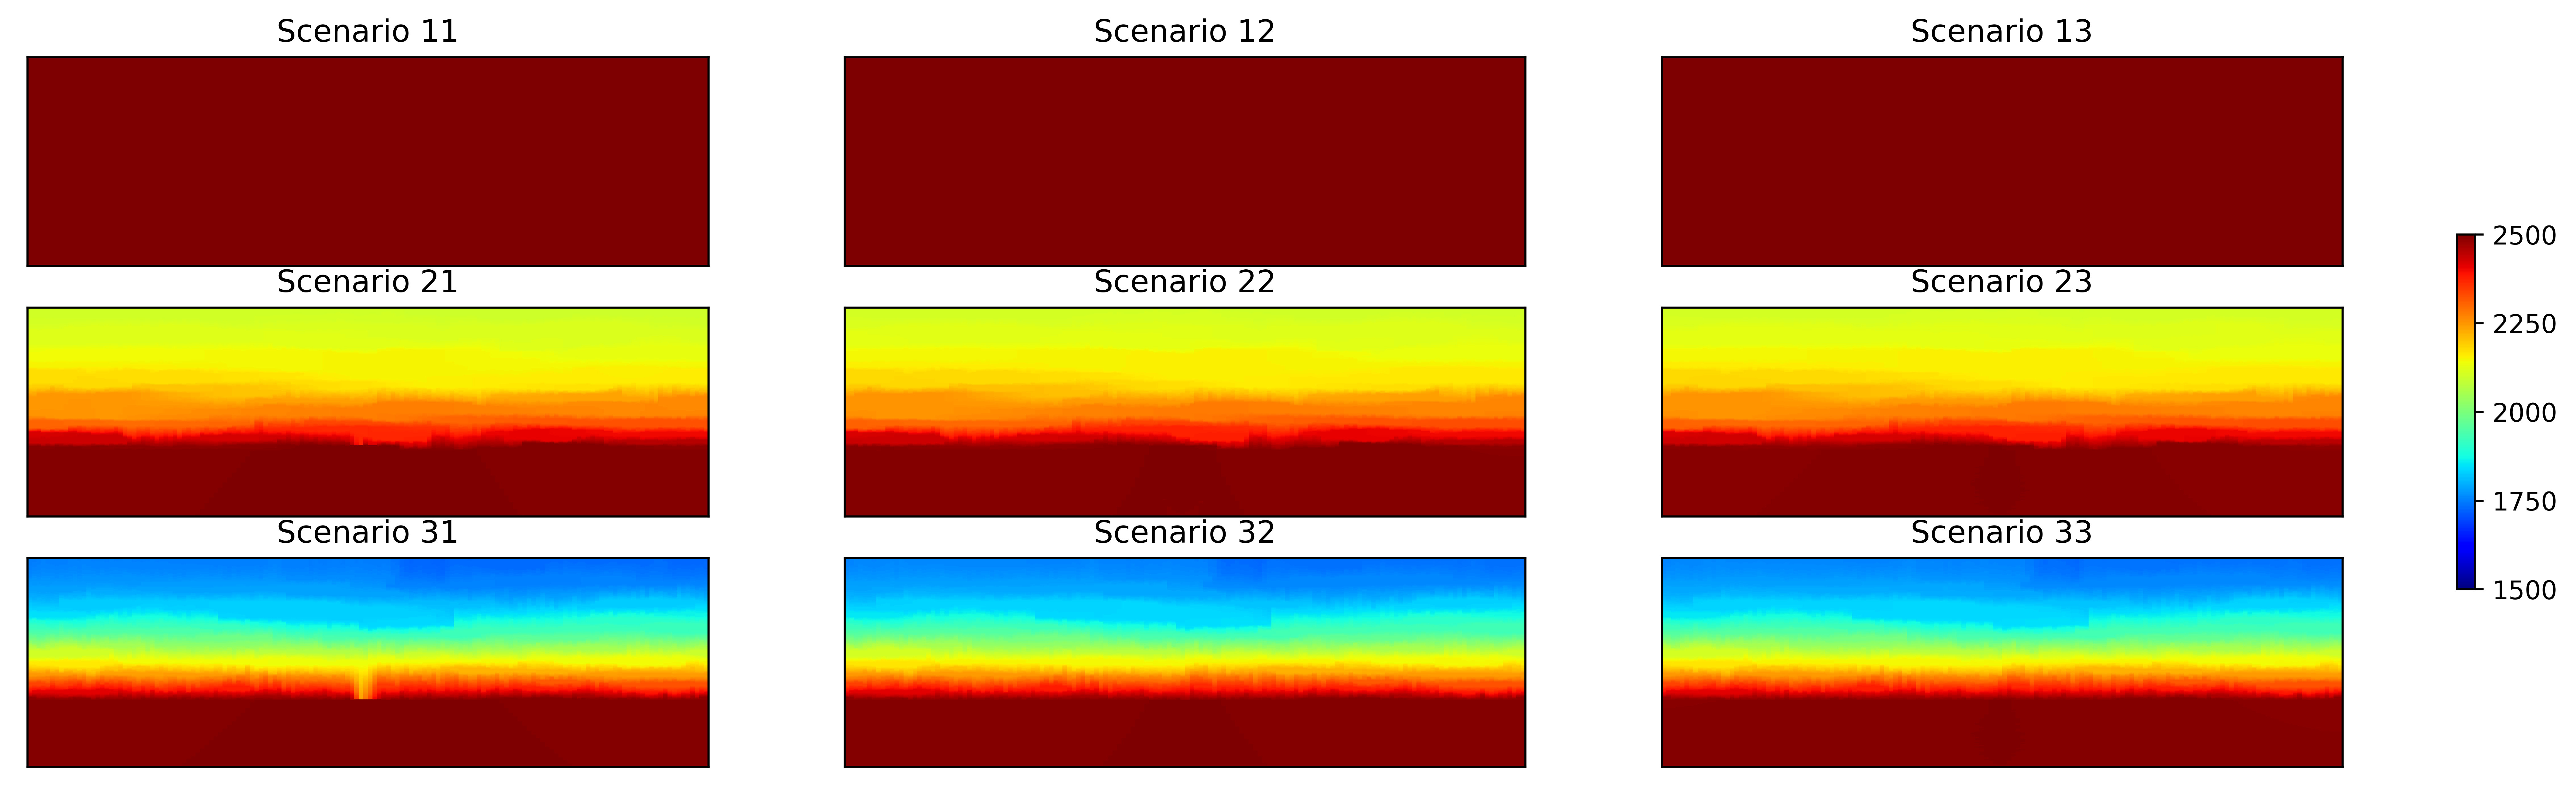

In [8]:
# Pbup field
pbup_11 = bdp.pressure_bup(sim_dict['pres_bup11'],geoshape)
pbup_12 = bdp.pressure_bup(sim_dict['pres_bup12'],geoshape)
pbup_13 = bdp.pressure_bup(sim_dict['pres_bup13'],geoshape)

pbup_21 = bdp.pressure_bup(sim_dict['pres_bup21'],geoshape)
pbup_22 = bdp.pressure_bup(sim_dict['pres_bup22'],geoshape)
pbup_23 = bdp.pressure_bup(sim_dict['pres_bup23'],geoshape)

pbup_31 = bdp.pressure_bup(sim_dict['pres_bup31'],geoshape)
pbup_32 = bdp.pressure_bup(sim_dict['pres_bup32'],geoshape)
pbup_33 = bdp.pressure_bup(sim_dict['pres_bup33'],geoshape)

# Plot all nine scenarios in 3x3 plot

fig, axs = plt.subplots(3, 3, figsize=(20,5),sharex=True,sharey=True,dpi=600)
for i in range(3):
    for j in range(3):
        pb = f'pbup_{i+1}{j+1}'
        pb_value = globals()[pb]
        im = axs[i,j].imshow(pb_value,cmap='jet',vmin=1500,vmax=2500,aspect='auto')

        axs[i,j].set_title(f'Scenario {i+1}{j+1}')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])



fig.colorbar(im, ax=axs.ravel().tolist(), orientation = 'vertical',shrink=0.5,pad=0.04,ticks=[1500,1750,2000,2250,2500])

plt.show()

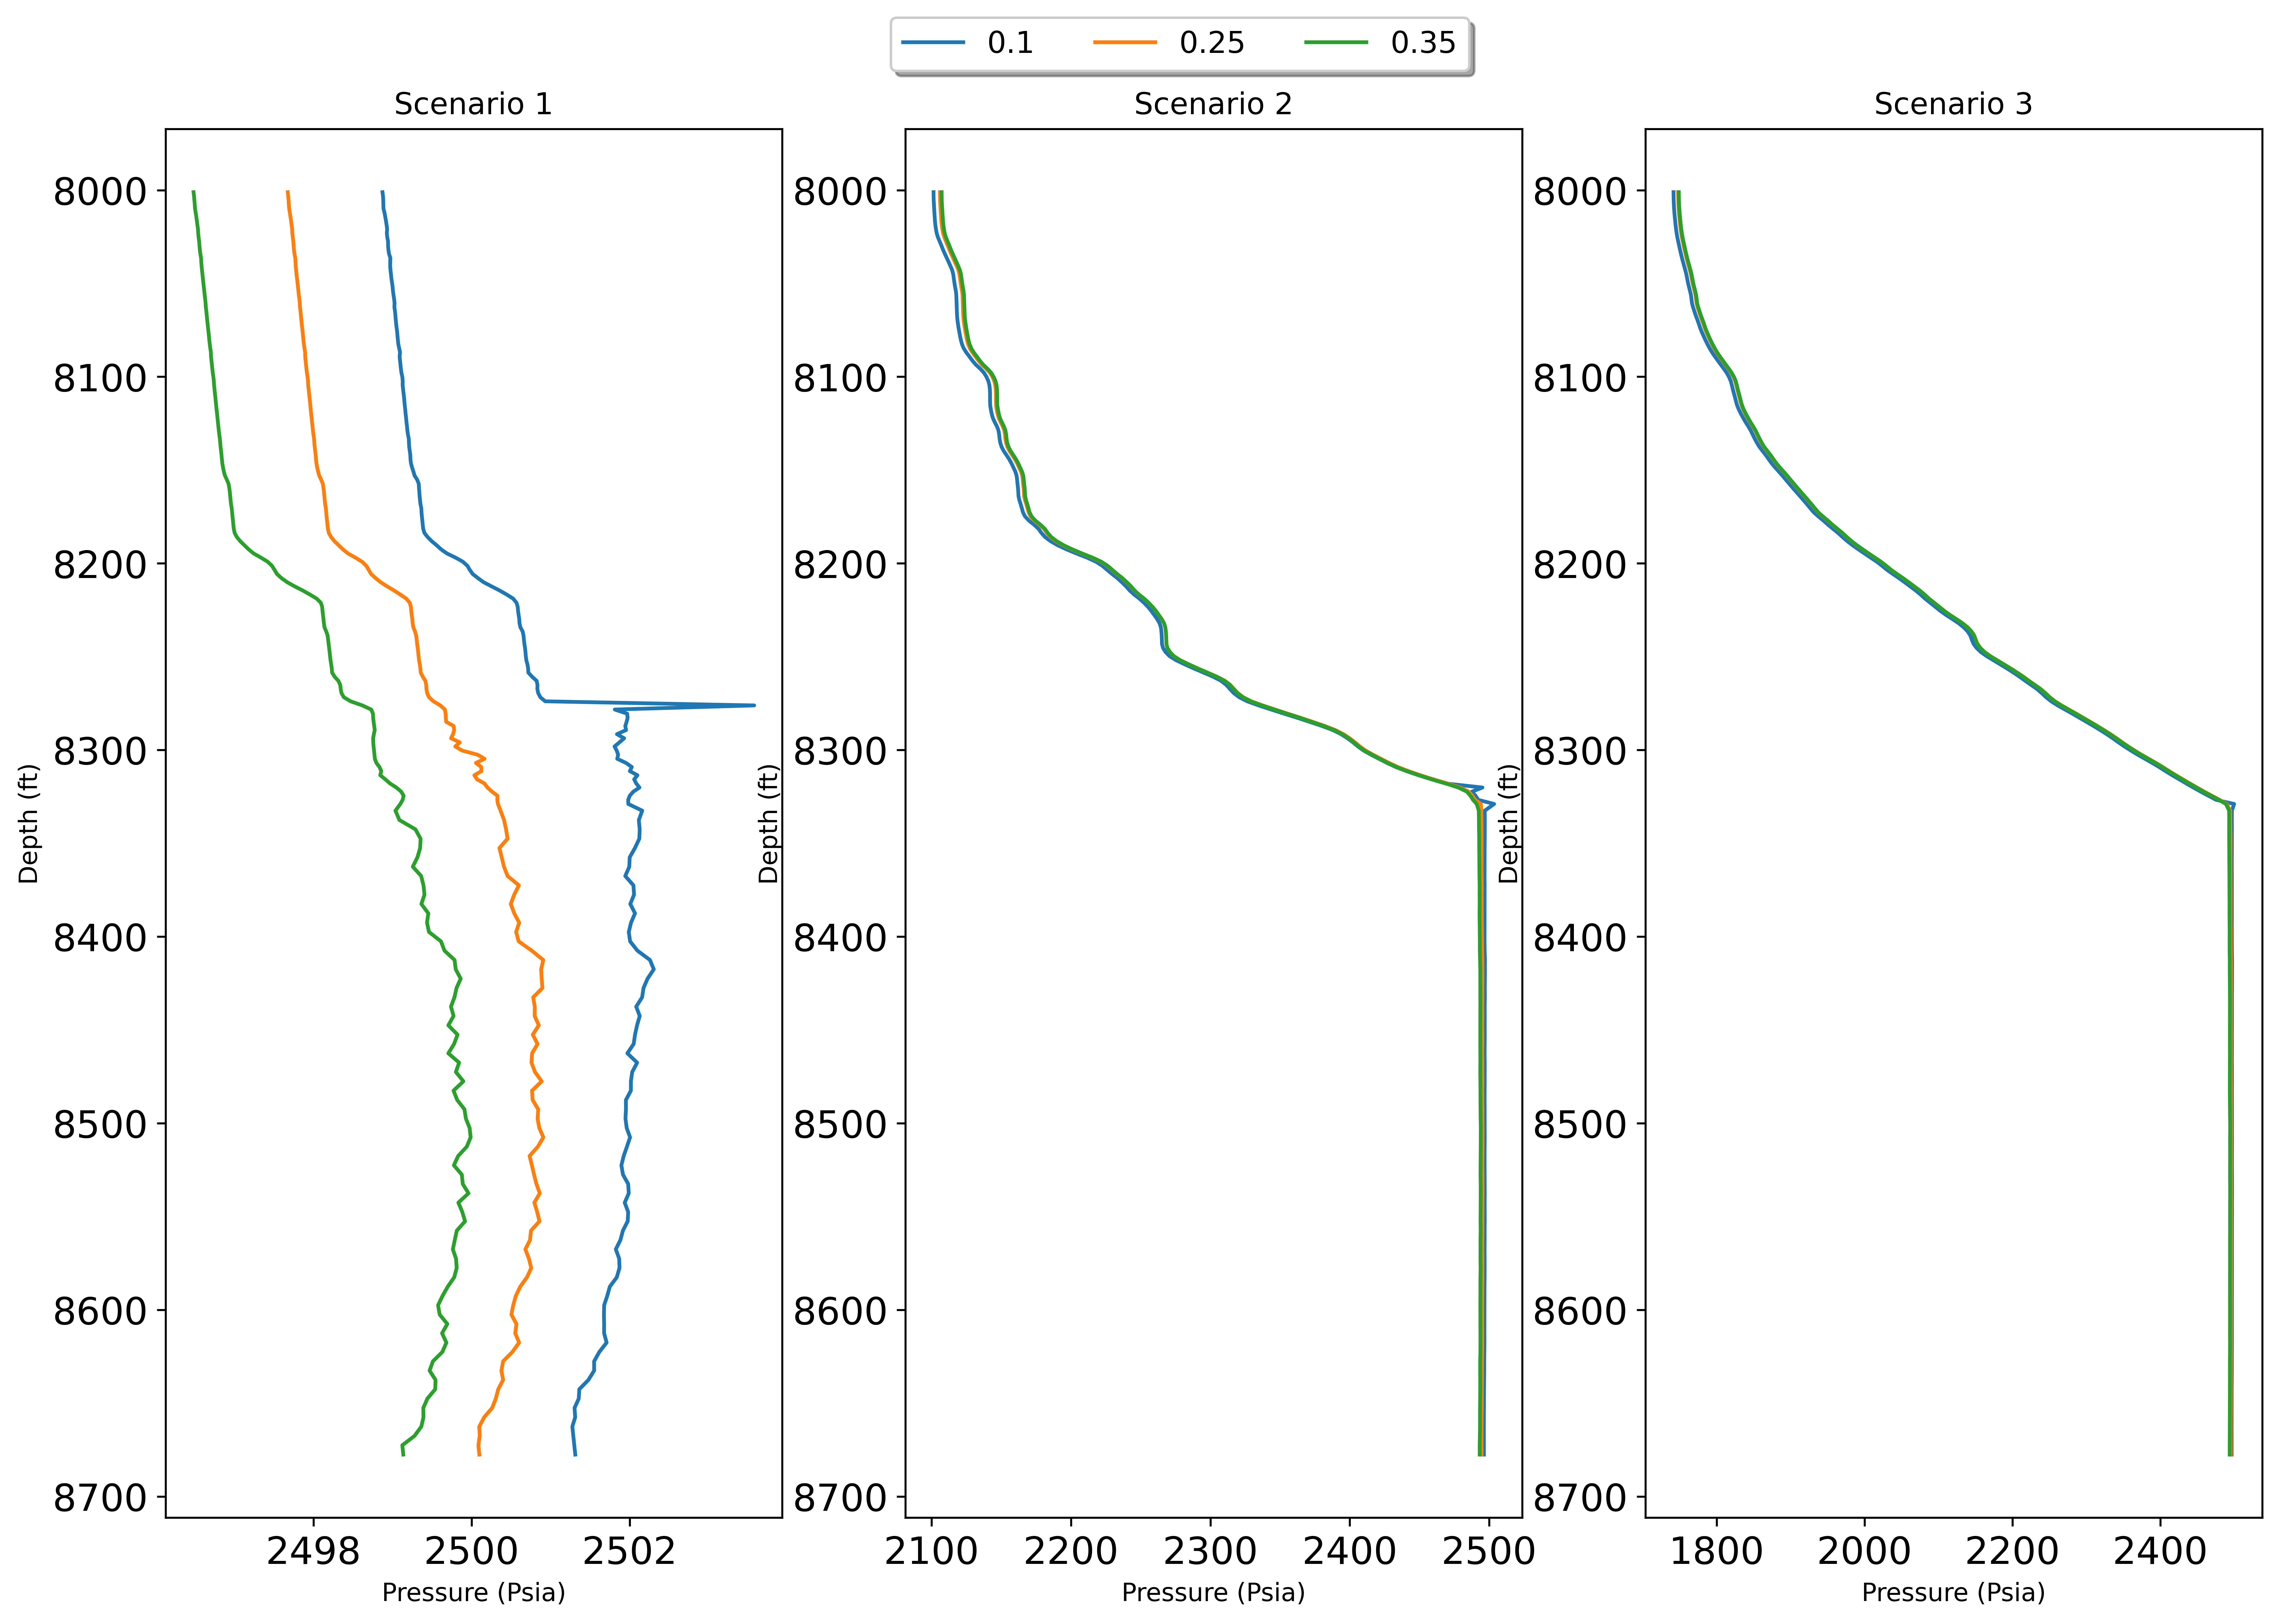

In [9]:
# Calculate mean pressure buildup
mean_pbup_11 = bdp.p_v_depth(sim_dict['pres_bup11'],sim_dict['z'],geoshape)
mean_pbup_12 = bdp.p_v_depth(sim_dict['pres_bup12'],sim_dict['z'],geoshape)
mean_pbup_13 = bdp.p_v_depth(sim_dict['pres_bup13'],sim_dict['z'],geoshape)

mean_pbup_21 = bdp.p_v_depth(sim_dict['pres_bup21'],sim_dict['z'],geoshape)
mean_pbup_22 = bdp.p_v_depth(sim_dict['pres_bup22'],sim_dict['z'],geoshape)
mean_pbup_23 = bdp.p_v_depth(sim_dict['pres_bup23'],sim_dict['z'],geoshape)

mean_pbup_31 = bdp.p_v_depth(sim_dict['pres_bup31'],sim_dict['z'],geoshape)
mean_pbup_32 = bdp.p_v_depth(sim_dict['pres_bup32'],sim_dict['z'],geoshape)
mean_pbup_33 = bdp.p_v_depth(sim_dict['pres_bup33'],sim_dict['z'],geoshape)

z = np.reshape(sim_dict['z'].values,newshape = geoshape,order='C')
z = np.flip(z,axis=0)

# Plot mean pressure buildup
fig, axs = plt.subplots(1, 3, figsize=(15,10),dpi=600)
for i in range(3):
    for j in range(3):
        mean_pbup = f'mean_pbup_{i+1}{j+1}'
        mean_pbup_value = globals()[mean_pbup]
        axs[i].plot(mean_pbup_value,z[:,0],label = f'Scenario {j+1}')
        axs[i].set_title(f'Scenario {i+1}')
        axs[i].set_ylabel('Depth (ft)')
        axs[i].set_xlabel('Pressure (Psia)')
        #axs[i].set_xlim(1500,3000)
        axs[i].invert_yaxis()
        axs[i].tick_params(axis='both', which='both', labelsize=15)
        #add one legend for all subplots
        if i == 0:
            handles, labels = axs[i].get_legend_handles_labels()
            by_label = dict(zip(labels, handles))

fig.legend(by_label.values(), [0.1,0.25,0.35], loc='upper center',ncol=3,
            fontsize='large',bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True)

plt.show()



In [11]:
# Calculate moments

mom3011 = bdp.moments(sim_dict['gas_saturation3011'],sim_dict['porosity11'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom6011 = bdp.moments(sim_dict['gas_saturation6011'],sim_dict['porosity11'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom3012 = bdp.moments(sim_dict['gas_saturation3012'],sim_dict['porosity11'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom6012 = bdp.moments(sim_dict['gas_saturation6012'],sim_dict['porosity11'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom3013 = bdp.moments(sim_dict['gas_saturation3013'],sim_dict['porosity11'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom6013 = bdp.moments(sim_dict['gas_saturation6013'],sim_dict['porosity11'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)


In [12]:
mom3021 = bdp.moments(sim_dict['gas_saturation3021'],sim_dict['porosity21'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom6021 = bdp.moments(sim_dict['gas_saturation6021'],sim_dict['porosity21'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom3022 = bdp.moments(sim_dict['gas_saturation3022'],sim_dict['porosity21'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom6022 = bdp.moments(sim_dict['gas_saturation6022'],sim_dict['porosity21'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom3023 = bdp.moments(sim_dict['gas_saturation3023'],sim_dict['porosity21'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom6023 = bdp.moments(sim_dict['gas_saturation6023'],sim_dict['porosity21'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)


In [13]:
mom3031 = bdp.moments(sim_dict['gas_saturation3031'],sim_dict['porosity31'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom6031 = bdp.moments(sim_dict['gas_saturation6031'],sim_dict['porosity31'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom3032 = bdp.moments(sim_dict['gas_saturation3032'],sim_dict['porosity31'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom6032 = bdp.moments(sim_dict['gas_saturation6032'],sim_dict['porosity31'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom3033 = bdp.moments(sim_dict['gas_saturation3033'],sim_dict['porosity31'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)

mom6033 = bdp.moments(sim_dict['gas_saturation6033'],sim_dict['porosity31'],
                    sim_dict['block_volume'],sim_dict['x'],sim_dict['z'],
                    geoshape)


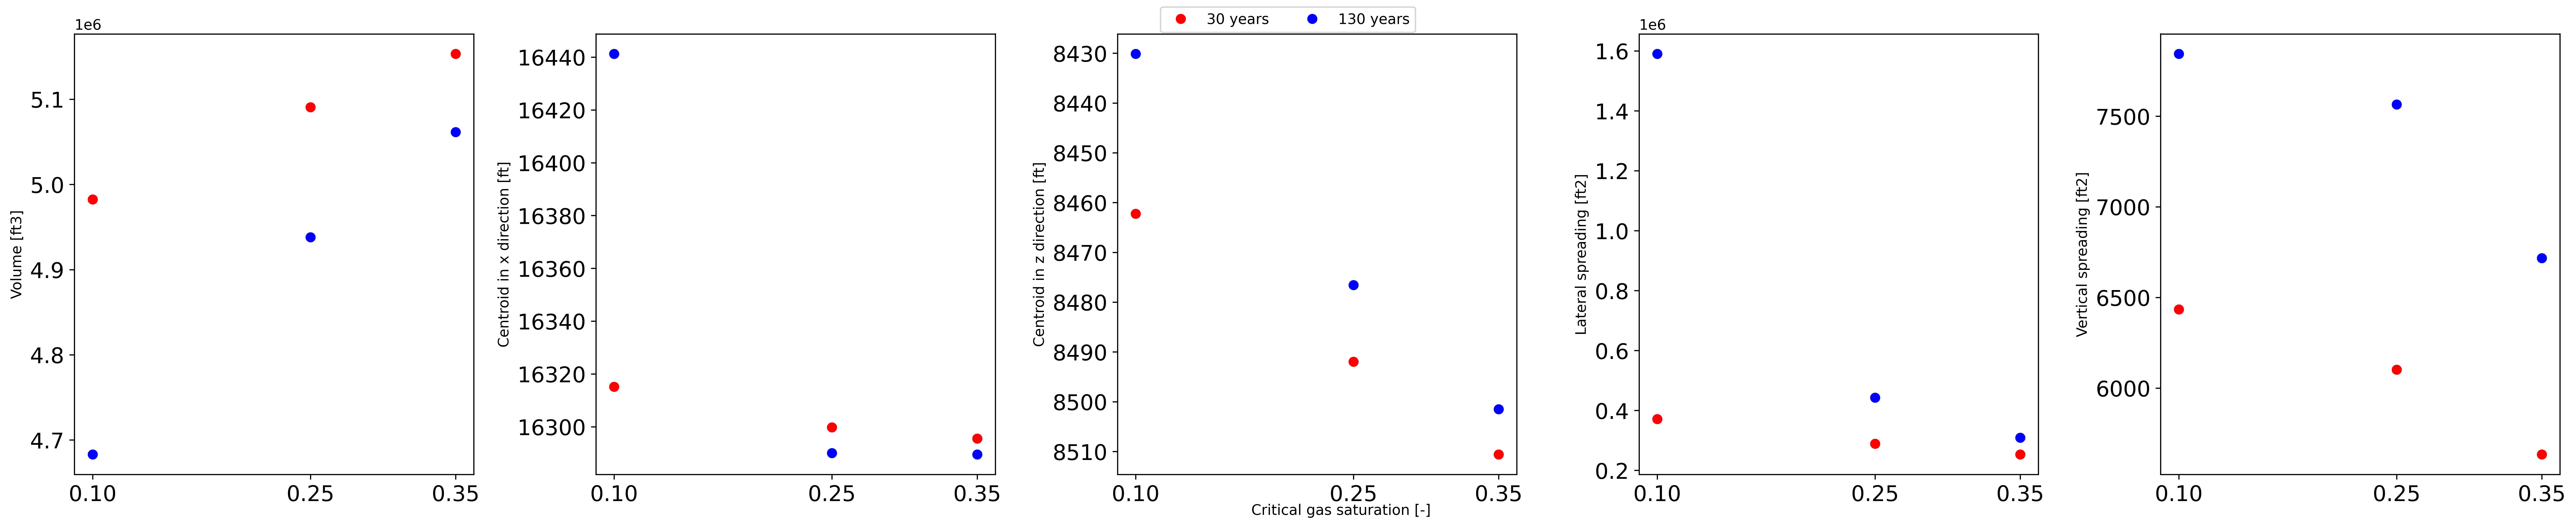

In [109]:
# Plot moments
fig,ax = plt.subplots(1,5,figsize=(25,5),sharex=True,dpi=600)

ax[0].plot(0.10,mom3011[0],'o',c='r',label='30 years')
ax[0].plot(0.10,mom6011[0],'o',c='b',label='130 years')
ax[0].plot(0.25,mom3012[0],'o',c='r')
ax[0].plot(0.25,mom6012[0],'o',c='b')
ax[0].plot(0.35,mom3013[0],'o',c='r')
ax[0].plot(0.35,mom6013[0],'o',c='b')

ax[0].set_ylabel('Volume [ft3]')


ax[1].plot(0.10,mom3011[1],'o',c='r')
ax[1].plot(0.10,mom6011[1],'o',c='b')
ax[1].plot(0.25,mom3012[1],'o',c='r')
ax[1].plot(0.25,mom6012[1],'o',c='b')
ax[1].plot(0.35,mom3013[1],'o',c='r')
ax[1].plot(0.35,mom6013[1],'o',c='b')


ax[1].set_ylabel('Centroid in x direction [ft]')

ax[2].plot(0.10,mom3011[2],'o',c='r')
ax[2].plot(0.10,mom6011[2],'o',c='b')
ax[2].plot(0.25,mom3012[2],'o',c='r')
ax[2].plot(0.25,mom6012[2],'o',c='b')
ax[2].plot(0.35,mom3013[2],'o',c='r')
ax[2].plot(0.35,mom6013[2],'o',c='b')

ax[2].set_ylabel('Centroid in z direction [ft]')
ax[2].invert_yaxis()

ax[3].plot(0.10,mom3011[3],'o',c='r')
ax[3].plot(0.10,mom6011[3],'o',c='b')
ax[3].plot(0.25,mom3012[3],'o',c='r')
ax[3].plot(0.25,mom6012[3],'o',c='b')
ax[3].plot(0.35,mom3013[3],'o',c='r')
ax[3].plot(0.35,mom6013[3],'o',c='b')


ax[3].set_ylabel('Lateral spreading [ft2]')

ax[4].plot(0.10,mom3011[4],'o',c='r')
ax[4].plot(0.10,mom6011[4],'o',c='b')
ax[4].plot(0.25,mom3012[4],'o',c='r')
ax[4].plot(0.25,mom6012[4],'o',c='b')
ax[4].plot(0.35,mom3013[4],'o',c='r')
ax[4].plot(0.35,mom6013[4],'o',c='b')

ax[4].set_ylabel('Vertical spreading [ft2]')

for i in range(5):
    ax[i].tick_params(axis='both', which='both', labelsize=15)

handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(by_label.values(), by_label.keys(), loc='upper center',ncol=3)
fig.text(0.52, 0.02, 'Critical gas saturation [-]', ha='center', va='center')
ax[0].set_xticks([0.1,0.25,0.35])


plt.tight_layout()
plt.show()

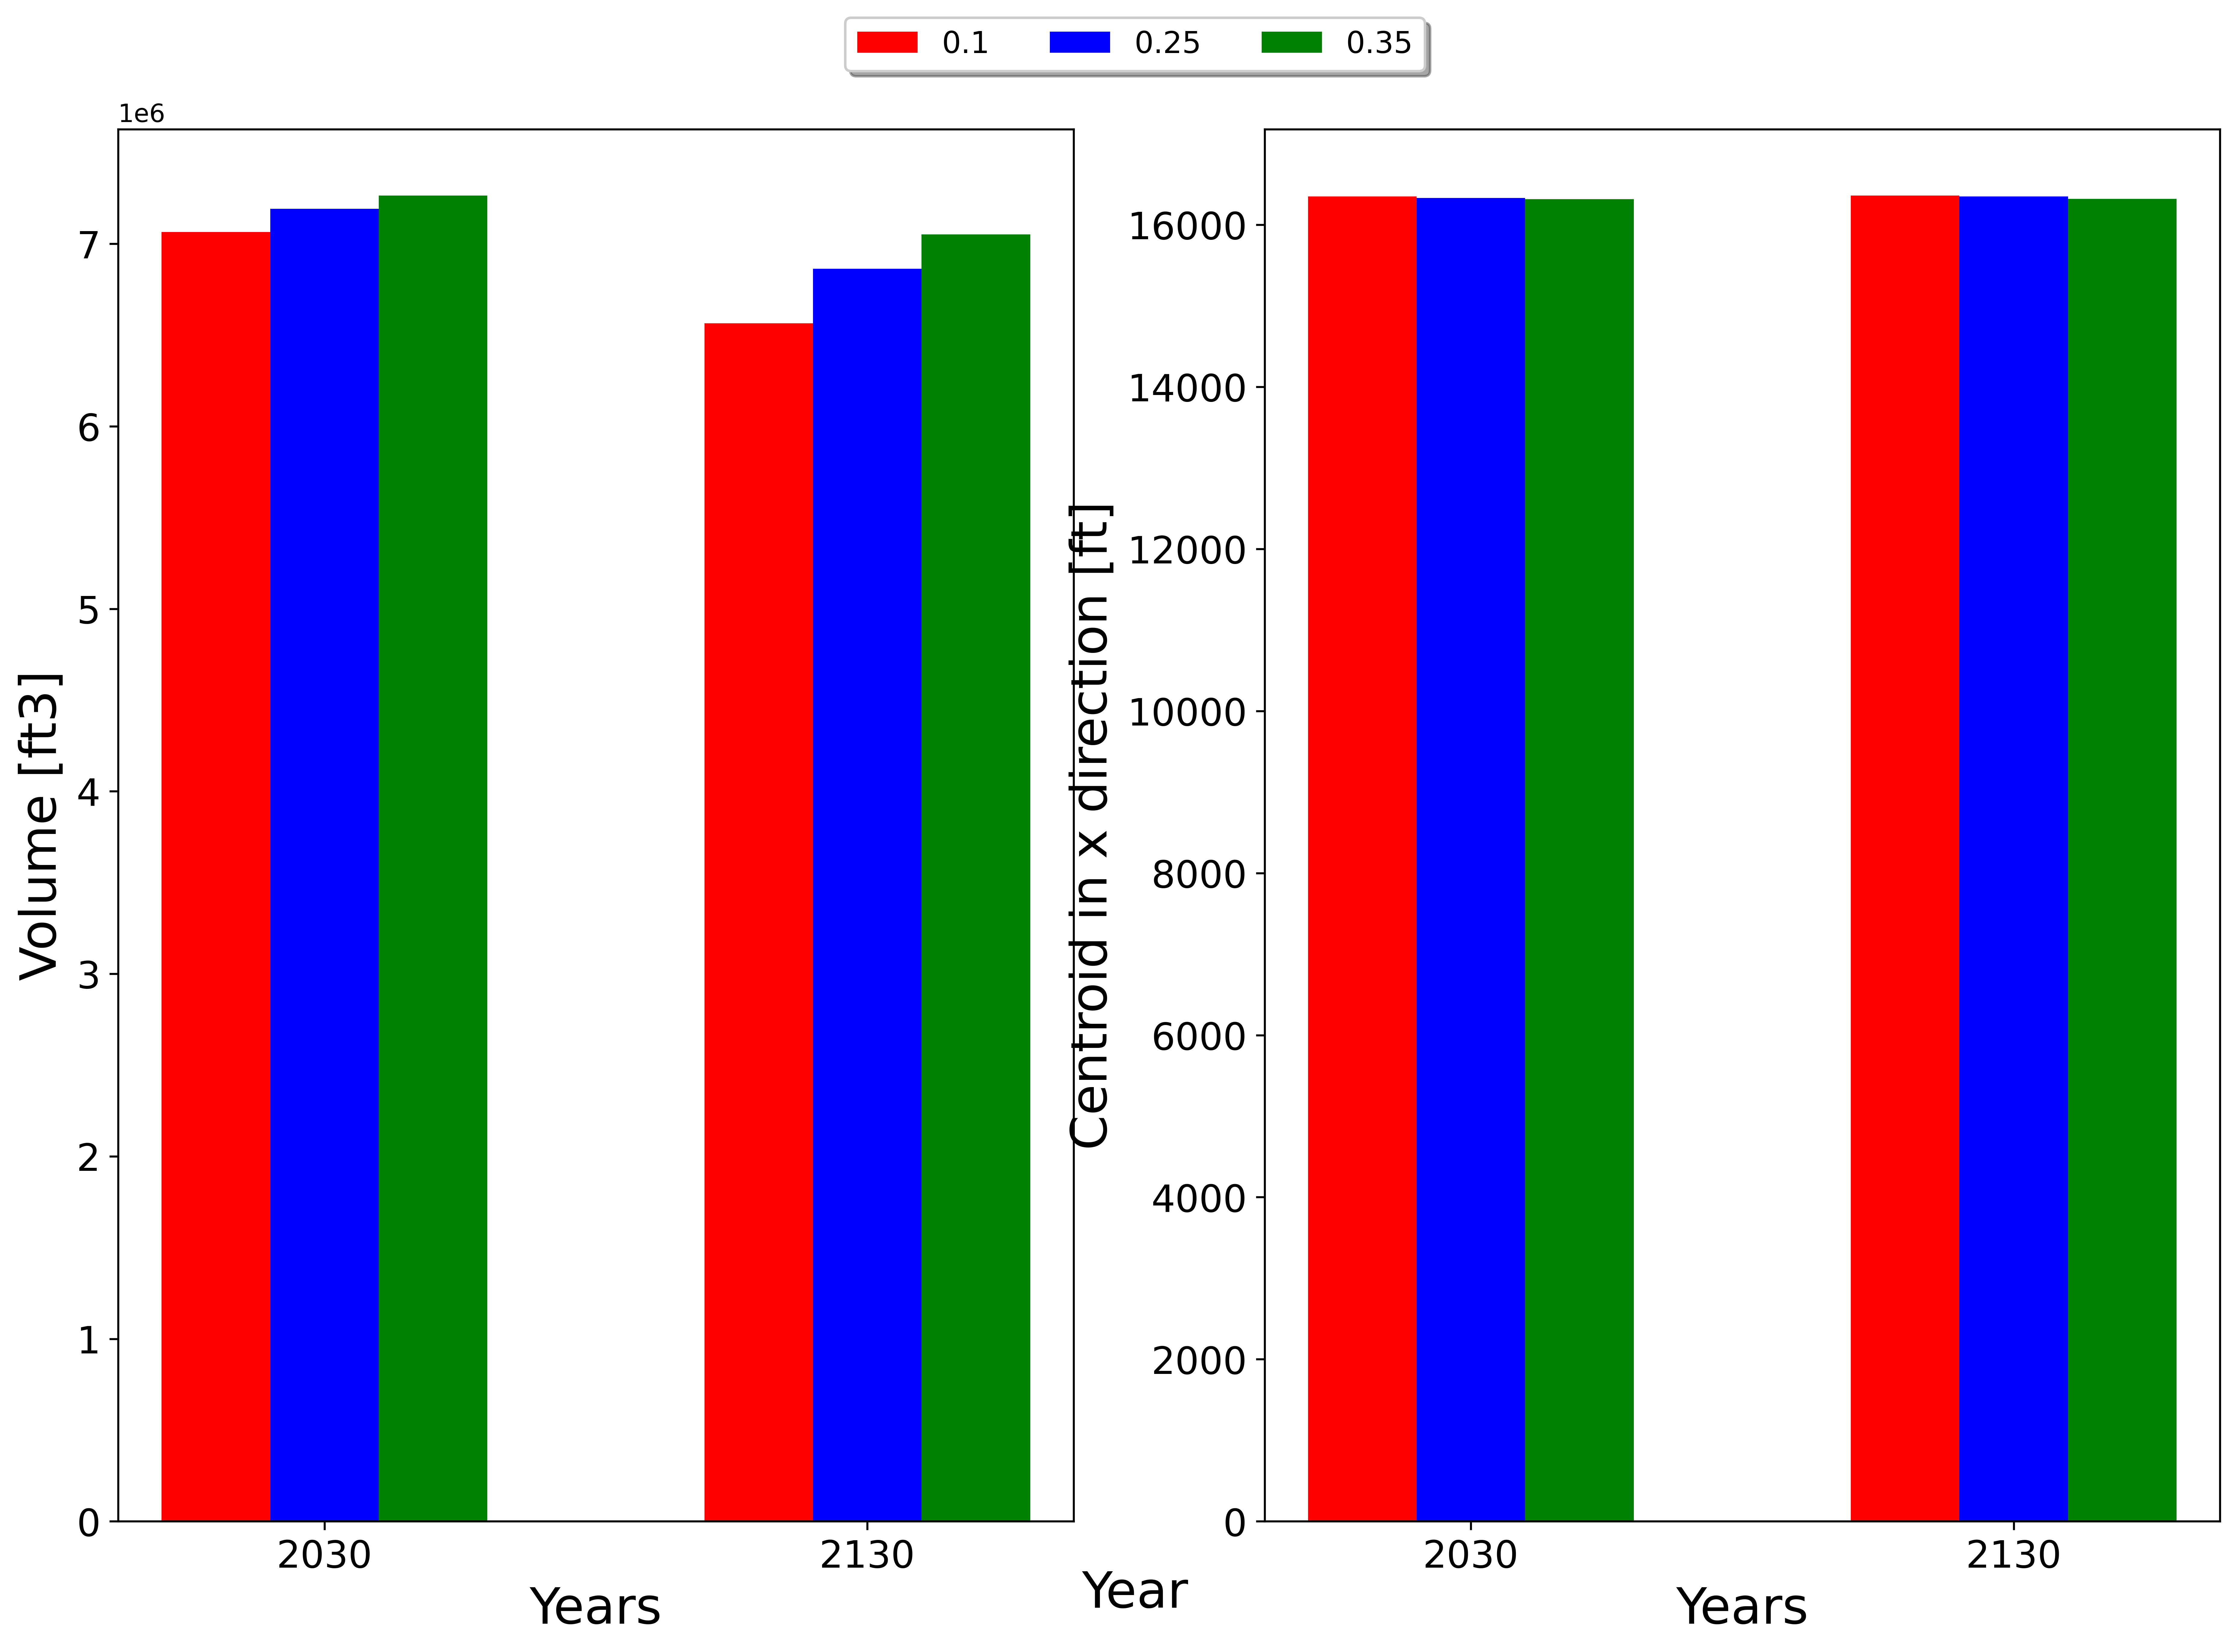

In [38]:
# Plot all moments in one bar chart where x axis is years and different bars for each critical gas saturation
fig,ax = plt.subplots(1,2,figsize=(15,10),sharex=True,dpi=600)
w = 0.03
ax[0].bar(0.1-w,mom3011[0],width=w,color='r',label='Snc = 0.10',align='center')
ax[0].bar(0.1,mom3012[0],width=w,color='b',label='Snc = 0.25',align='center')
ax[0].bar(0.1+w,mom3013[0],width=w,color='g',label='Snc = 0.35',align='center')
ax[0].bar(0.25-w,mom6011[0],width=w,color='r',label='Snc = 0.10',align='center')
ax[0].bar(0.25,mom6012[0],width=w,color='b',label='Snc = 0.25',align='center')
ax[0].bar(0.25+w,mom6013[0],width=w,color='g',label='Snc = 0.35',align='center')
ax[0].set_ylabel('Volume [ft3]')
ax[0].set_xlabel('Years')
ax[0].set_xticks([0.1,0.25])
ax[0].set_xticklabels(['2030','2130'])

ax[1].bar(0.1-w,mom3011[1],width=w,color='r',label='Snc = 0.10',align='center')
ax[1].bar(0.1,mom3012[1],width=w,color='b',label='Snc = 0.25',align='center')
ax[1].bar(0.1+w,mom3013[1],width=w,color='g',label='Snc = 0.35',align='center')
ax[1].bar(0.25-w,mom6011[1],width=w,color='r',label='Snc = 0.10',align='center')
ax[1].bar(0.25,mom6012[1],width=w,color='b',label='Snc = 0.25',align='center')
ax[1].bar(0.25+w,mom6013[1],width=w,color='g',label='Snc = 0.35',align='center')
ax[1].set_ylabel('Centroid in x direction [ft]')
ax[1].set_xlabel('Years')
ax[1].set_xticklabels(['2030','2130'])

ax[0].tick_params(axis='both', which='both', labelsize=15)
ax[1].tick_params(axis='both', which='both', labelsize=15)

handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(by_label.values(), [0.1,0.25,0.35], loc='upper center',ncol=3,
            fontsize='large',bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True)

fig.text(0.5, 0.07, 'Year', ha='center', va='center',fontsize=20)

plt.rc('axes', titlesize=20)
plt.show()






In [52]:
fig, axs = plt.subplots(3,5,figsize=(40,18),sharex=True,dpi=600)
w = 0.03

titles = ['Volume [ft3]', 'Plume centroid in x direction [ft]', 'Plume centroid in y direction [ft]', 'Lateral spreading [ft2]', 'Vertical spreading [ft2]']
y_title = ['NTG: 0.9','NTG:0.5','NTG:0.2']
for k in range(5):
    axs[0,k].set_title(titles[k],fontsize=20)
    for i in range(3):
        axs[i,0].set_ylabel(y_title[i],fontsize=20)
        for j in range(3):
            temp30 = f'mom30{i+1}{j+1}'
            temp60 = f'mom60{i+1}{j+1}'

            mom30 = globals()[temp30]
            mom60 = globals()[temp60]

            mom30 = mom30[k]
            mom60 = mom60[k]

            axs[i,k].set_xticks([0.1,0.25])
            axs[i,k].set_xticklabels(['2030','2130'])
            
            if j == 0:
                axs[i,k].bar(0.1-w,mom30,width=w,color='r',label='Snc = 0.10',align='center')
                axs[i,k].bar(0.25-w,mom60,width=w,color='r',label='Snc = 0.10',align='center')
            elif j == 1:
                axs[i,k].bar(0.1,mom30,width=w,color='b',label='Snc = 0.25',align='center')
                axs[i,k].bar(0.25,mom60,width=w,color='b',label='Snc = 0.25',align='center')
            else:
                axs[i,k].bar(0.1+w,mom30,width=w,color='g',label='Snc = 0.35',align='center')
                axs[i,k].bar(0.25+w,mom60,width=w,color='g',label='Snc = 0.35',align='center')

handles, labels = axs[0,0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(by_label.values(), [0.1,0.25,0.35], loc='upper center',ncol=3,
            fontsize='x-large',bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True)

fig.text(0.5, 0.07, 'Year', ha='center', va='center',fontsize=20)

plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=25)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=15)

plt.show()


